In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import random

In [2]:
data = pd.read_csv('country-list.csv')
data.head()

,place
0,Abkhazia
1,Afghanistan
2,Akrotiri and Dhekelia
3,Albania
4,Algeria


In [3]:
for col in data.columns:
    print(col)

place


In [4]:
data['Start'] = data['place'].apply(lambda x : str(x)[0])
data['End'] = data['place'].apply(lambda x : str(x)[-1])
data['End'] = data['End'].str.capitalize()
data.head()

,place,Start,End
0,Abkhazia,A,A
1,Afghanistan,A,N
2,Akrotiri and Dhekelia,A,A
3,Albania,A,A
4,Algeria,A,A


In [5]:
data.count()

place    496
Start    496
End      496
dtype: int64

In [6]:
print(data['Start'].value_counts())
data['End'].value_counts()

S    62
B    47
M    40
A    36
P    33
C    32
T    30
N    29
G    23
L    20
K    18
D    15
E    13
H    12
V    11
F    11
R    11
U    10
I    10
J     9
W     9
O     5
Y     5
Z     3
Q     2
Name: Start, dtype: int64


A    145
N     63
S     46
E     42
O     33
D     25
I     25
Y     21
U     17
T     16
R     15
L      9
M      8
K      7
C      5
H      5
G      5
W      3
Z      2
Q      1
B      1
V      1
F      1
Name: End, dtype: int64

<AxesSubplot: xlabel='Start', ylabel='Count'>

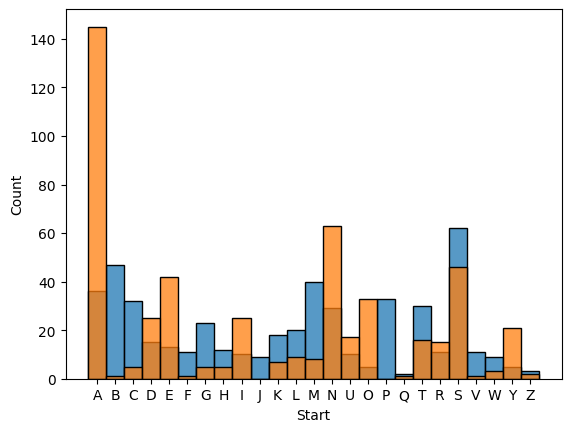

In [7]:
sns.histplot(data = data,x = data['Start'], legend = "Num")
sns.histplot(data = data, x = data['End'], legend = "Num")

In [8]:
data['Start'].groupby(data['End'] == "N").value_counts()[True]

Start
S    9
B    8
T    6
A    5
G    5
K    5
L    4
C    3
J    3
Y    3
I    2
P    2
D    1
E    1
F    1
H    1
O    1
R    1
U    1
W    1
Name: Start, dtype: int64

In [9]:
data['End'].groupby(data['Start'] == 'R').value_counts()[True]

End
A    4
E    1
H    1
K    1
N    1
O    1
T    1
U    1
Name: End, dtype: int64

In [10]:
death = ['A', 'D', 'E', 'I', 'N', 'O', 'R', 'U', 'Y']
a = []

a =  (data['Start'] == 'S').value_counts()
a[True]


62

In [11]:
def oppn_word(word):
  global data
  oppn = input("Enter the place\n")
    
  if oppn in set(data['place']) and oppn[0].capitalize() == word:
     data = data[data['place'].str.contains(oppn) == False]
     print(oppn)
     my_turn = True
  else:
     print("The place doesn't exist. Try again") 
     my_turn = False

  return oppn, my_turn
  


In [17]:
def my_word(oppn, game_on):

    global data
    word = 'a'
    arr = set()
    arr2 = []
    arr3 = set()
    pl = []
    num = sys.maxsize
    indi = []
    count = []
    ind = 0
    arr_list2 = []
    
    x = oppn[-1].capitalize()

    print((data['Start'] == x).value_counts().get(True, 0))

    if not (data['Start'] == x).value_counts().empty and not (data['Start'] == x).value_counts().get(True, 0):
       print("You Won! Congratulations!!")
       return '', game_on == False

    for idx, row in data.iterrows():
        if row['Start'] == x:
            arr.add(row['End'])
            pl.append(row['place'])
    
    arr_list = list(arr)
    print(pl)
    print(arr)
    print(arr_list)
    for i in arr:
        for idx, row in data.iterrows():
            if row['Start'] == i:
                arr3.add(row['End'])
        arr2.append(arr3)
        arr3 = set()
    
    print(arr2)
    for i, sublist in enumerate(arr2):
        if num != sys.maxsize:
            count.append(num)
            num = sys.maxsize
        for j in sublist:
            if j in death:
                #count.append((data['Start'] == j).value_counts()[True])
                if not (data['Start'] == j).value_counts().empty and (data['Start'] == j).value_counts().get(True):
                  num = min(num, (data['Start'] == j).value_counts()[True])
                  if j == arr_list[i]:
                     num = num - 1
                #count.append((data['Start'] == j).sum())
                #arr_list2.append(j)
        #indi.append(num.index(arr2))
    count.append(num)
    print(count)
    curr = max(count)
    print(curr)
    for index, value in enumerate(count):
      if value == curr and arr_list[index] in death:
         indi.append((data['Start'] == arr_list[index]).value_counts()[True])
         arr_list2.append(arr_list[index])

    if indi:
     print(indi)
     print(arr_list2)
     indi2 = max(indi)
     ind = indi.index(indi2)
     print(arr_list2[ind])
     print(indi2)
     print(ind)
     #if count:
     # curr = max(count)
     #
     #print(indi)
     #
     print(arr)
     print(pl)
     print(arr2)
     print(count)

     for i in pl:
        if i[-1].capitalize() == arr_list2[ind]:
            print(i)
            data = data[data['place'].str.contains(i) == False]
            return arr_list2[ind], game_on
    else:
      for index, value in enumerate(count):
         if value == curr:
            for i in pl:
               if i[-1].capitalize() == arr_list[index]:
                 print(i)
                 data = data[data['place'].str.contains(i) == False]
                 return arr_list[index], game_on
                 
    game_on = False
    return ' ', game_on 
    
    #print(num)
    


In [18]:
game_on = True
my_turn = False
place = random.choice(data['place'])
print(place)
word = place[-1].capitalize()
print(word)

while game_on == True:
 
 if my_turn == False:
   #oppon, my_turn = oppn_word(word)
   
  oppn = input("Enter the place\n")

  if oppn in set(data['place']) and oppn[0].capitalize() == word:
     data = data[data['place'].str.contains(oppn) == False]
     print(oppn)  
     my_turn = True
  else:
    print("The place doesn't exist or have been played before. Try again") 

 if my_turn == True:
   result =  my_word(oppn, game_on)
   word = result[0]
   game_on = result[1]

   if not game_on:
     print("Game Over")
     break
   
   print((data['Start'] == word[0].capitalize()).value_counts()[True])
   #print(word)
   my_turn = False


    

San Marino
O
Oman
23
['Nagorno-Karabakh Republic', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norfolk Island', 'North Korea', 'Northern Cyprus', 'Northern Mariana Islands', 'Nassau', "N'Djamena", 'Nicosia', 'Nuuk', 'New Delhi', 'Nairobi', 'Nouakchott', 'Nouméa', 'Niamey', 'Nicosia', 'Ngerulmud', 'Nukuʻalofa']
{'Y', 'I', 'D', 'T', 'A', 'S', 'C', 'R', 'L', 'U', 'K'}
['Y', 'I', 'D', 'T', 'A', 'S', 'C', 'R', 'L', 'U', 'K']
[{'N', 'O'}, {'N', 'D', 'Q', 'Y', 'L'}, {'N', 'A', 'E', 'S', 'C', 'R', 'O', 'I'}, {'N', 'I', 'D', 'T', 'A', 'S', 'Y', 'L', 'O', 'U'}, set(), {'N', 'M', 'D', 'T', 'A', 'E', 'S', 'R', 'Y', 'L', 'O', 'I'}, {'N', 'F', 'D', 'A', 'E', 'S', 'C', 'Y', 'O', 'U'}, {'N', 'H', 'T', 'A', 'O', 'U', 'K'}, {'N', 'G', 'Z', 'A', 'E', 'S', 'O'}, {'N', 'D', 'A', 'E', 'S', 'R', 'Y'}, {'N', 'M', 'V', 'U', 'T', 'A', 'R', 'Y', 'L', 'O', 'I'}]
[3, 4, 3, 3, 3, 3, 3, 3, 4, 3]
4
[7]
['I']
I
7
0
{'Y', 'I', 'D', 'T', 'A', 'S', 'C', 'R', 'L', 'U', 'K'}
['Nagorno-Karabakh Re